This is a purely qualitative analysis. This is why this part is detached from the "benchmarking.ipynb". It does its own 2D "benchmarking" but rather to produce the trajectory points that go into the 2D contour plots. The trajectories seen here should qualitatively represent the ones in the benchmarking, however they are not actual runs that went into the performance tables. 

### Imports

In [1]:
###########
# Imports #
###########

# importing libraries
import matplotlib.pyplot as plt
import copy
# importing algorithms
from Stochastic_local_search import*
from Cuadratic_opt_v2 import *
from Scipy_opt_algs import*
from BO_NpScpy import*
# importing test functions
from test_function import*
from utils import *
from COBYQA import *
from ScikitQuant_opt_algs import *
from pySOT_opt_algs import *
from CUATRO import *

### Basic lists and values

In [2]:
algorithms_test = [
    # LS_QM_v2, 
    # opt_SnobFit,
    # opt_SRBF,
    # opt_DYCORS,
    # opt_SOP,
    # opt_COBYLA,
    # COBYQA,
    # opt_CUATRO,
# # Feel free to add these commented-out algorithms as a further test,
# # however, do note they are more time-consuming to run
# BO_np_scipy
]

functions_test  = [  #!!! Multimodal before Unimodal!!!
    'Levy_f',
    'Ackley_f',
    'Rosenbrock_f',
    'Antonio_f',
    ]

multim  = ['Levy_f', 'Ackley_f']
unim    = ['Rosenbrock_f', 'Antonio_f']

# no. input dimensions
N_x_ = 2

# repetition for random shift
i_rep = 0
reps         = 5
# randShift_l = np.random.uniform(-3,3, (reps,N_x_))
# x_shift_ = randShift_l[i_rep,:].reshape((N_x_,1))



# bounds and other settings
track_x = True
x_shift_origin = np.array([[0],[0]]) # when wanting to not shift the objective function
bounds_ = np.array([[-7., 7.], [-7., 7.]]) # x1 bounds, x2 bounds these are taken from the benchmarking routine
bounds_plot = np.array([[-7, 7], [-7, 7]]) 
samples_number = 10 # for BO


### Run 2 dimensional and plot trajectory

<function opt_SRBF at 0x000002E9EAF00F40>
40


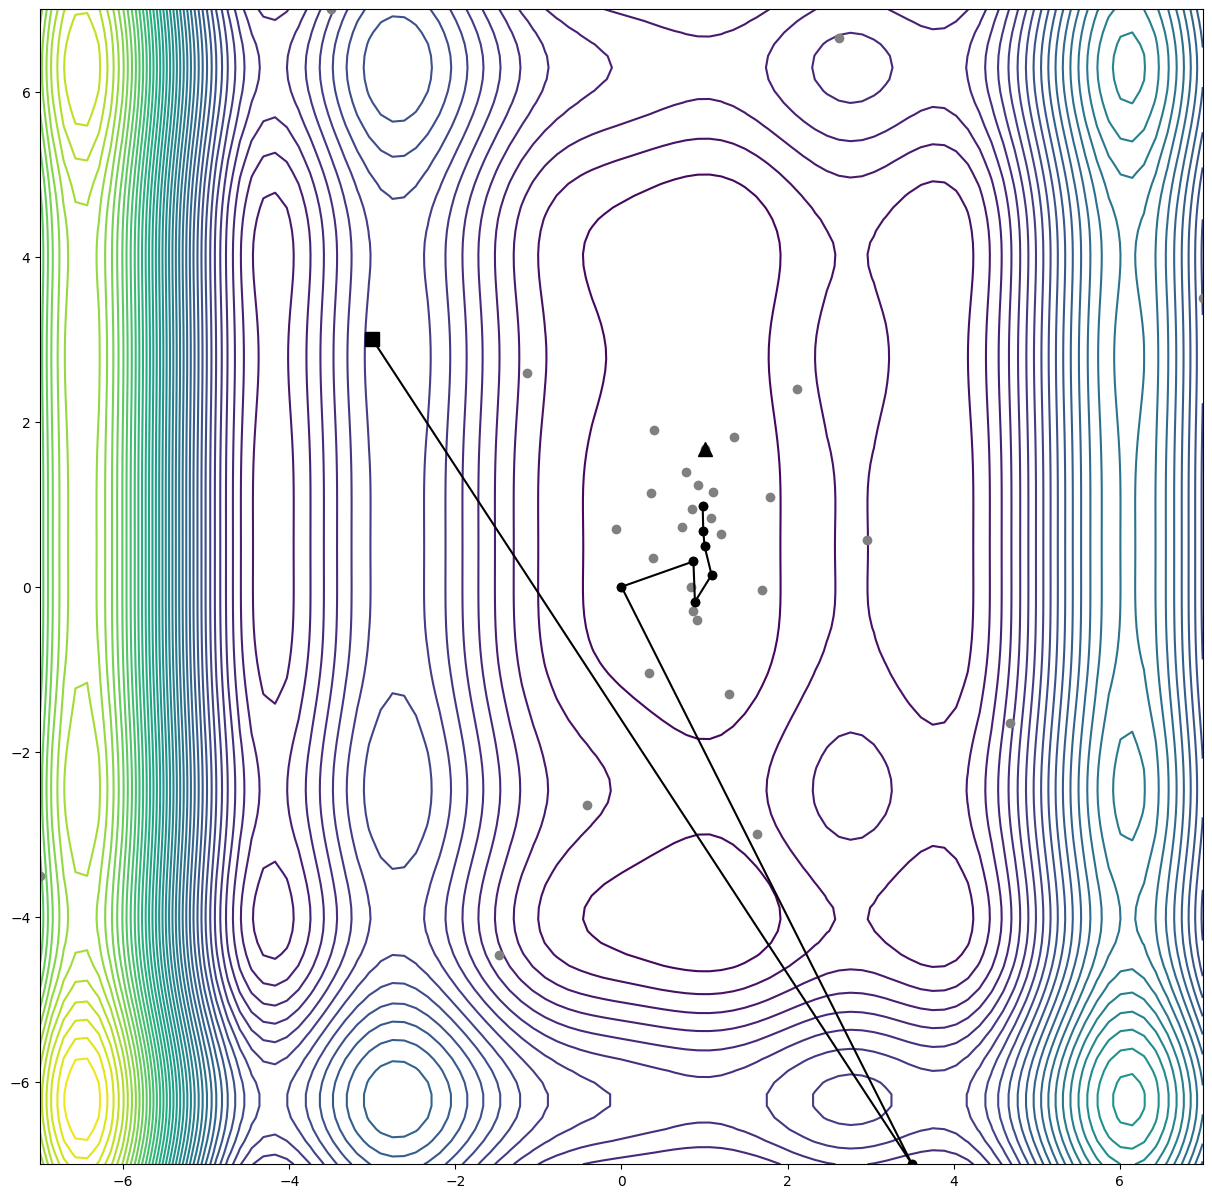

<function opt_SRBF at 0x000002E9EAF00F40>
40


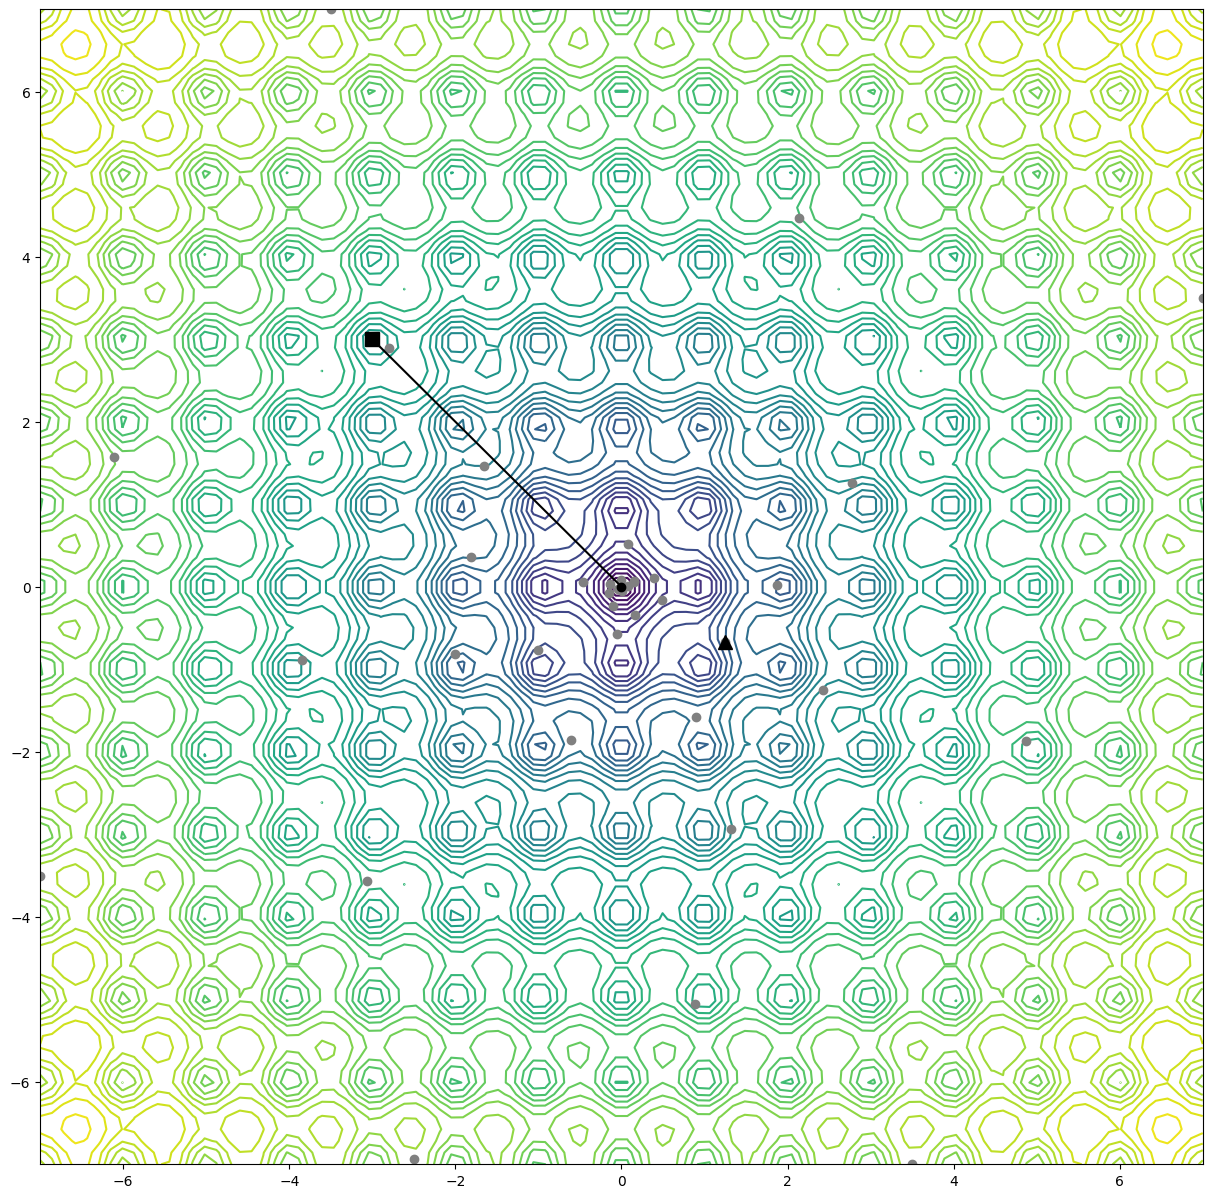

<function opt_SRBF at 0x000002E9EAF00F40>
40


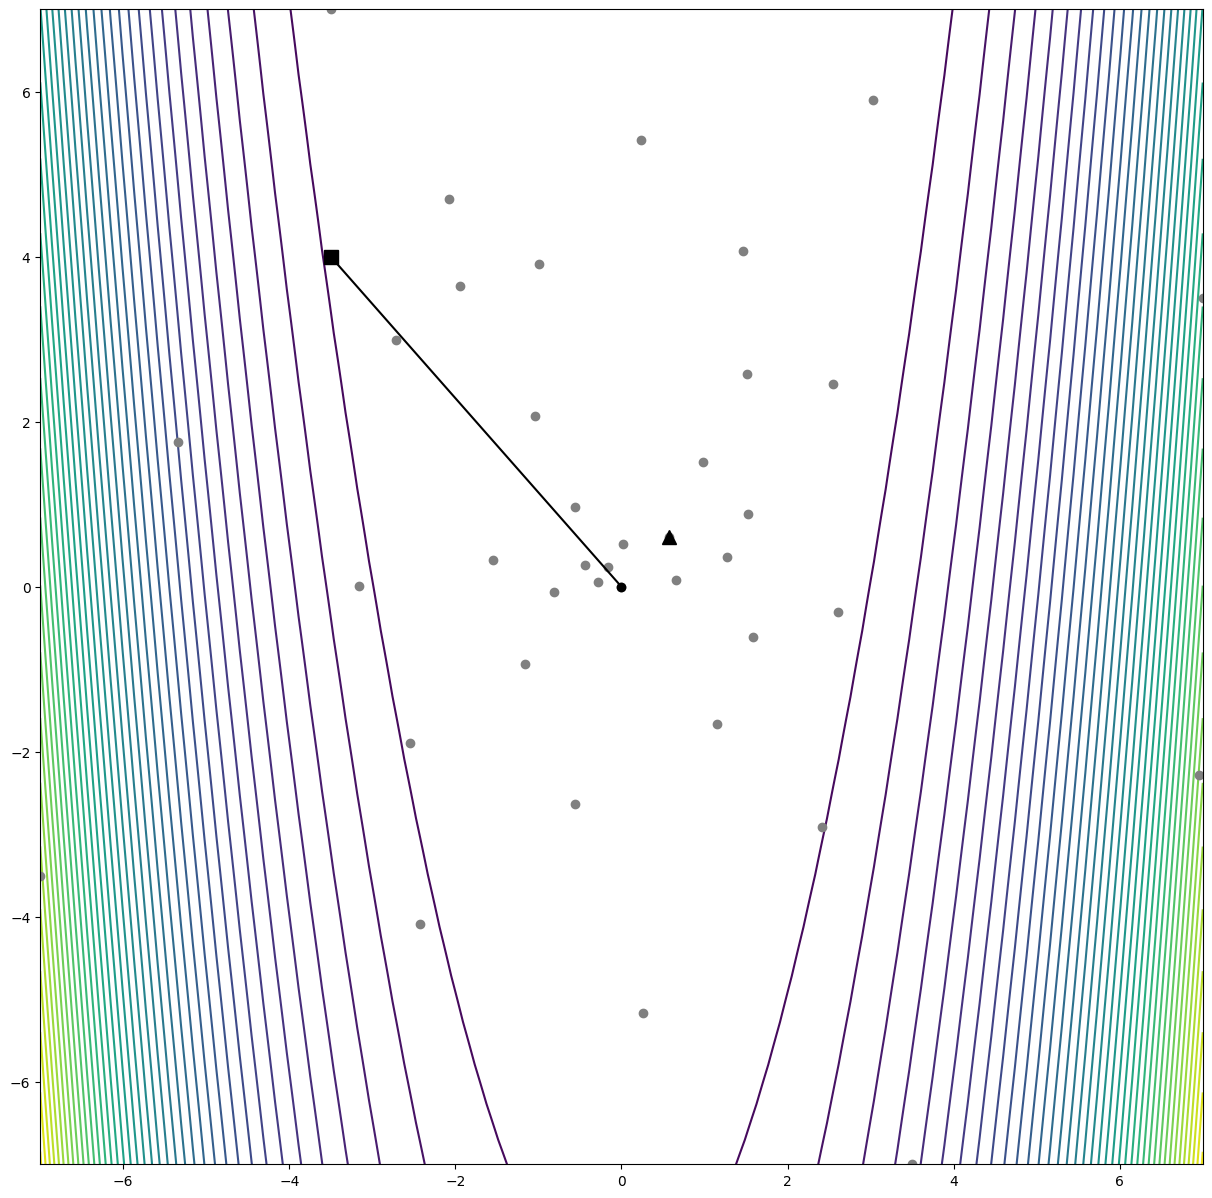

<function opt_SRBF at 0x000002E9EAF00F40>
40


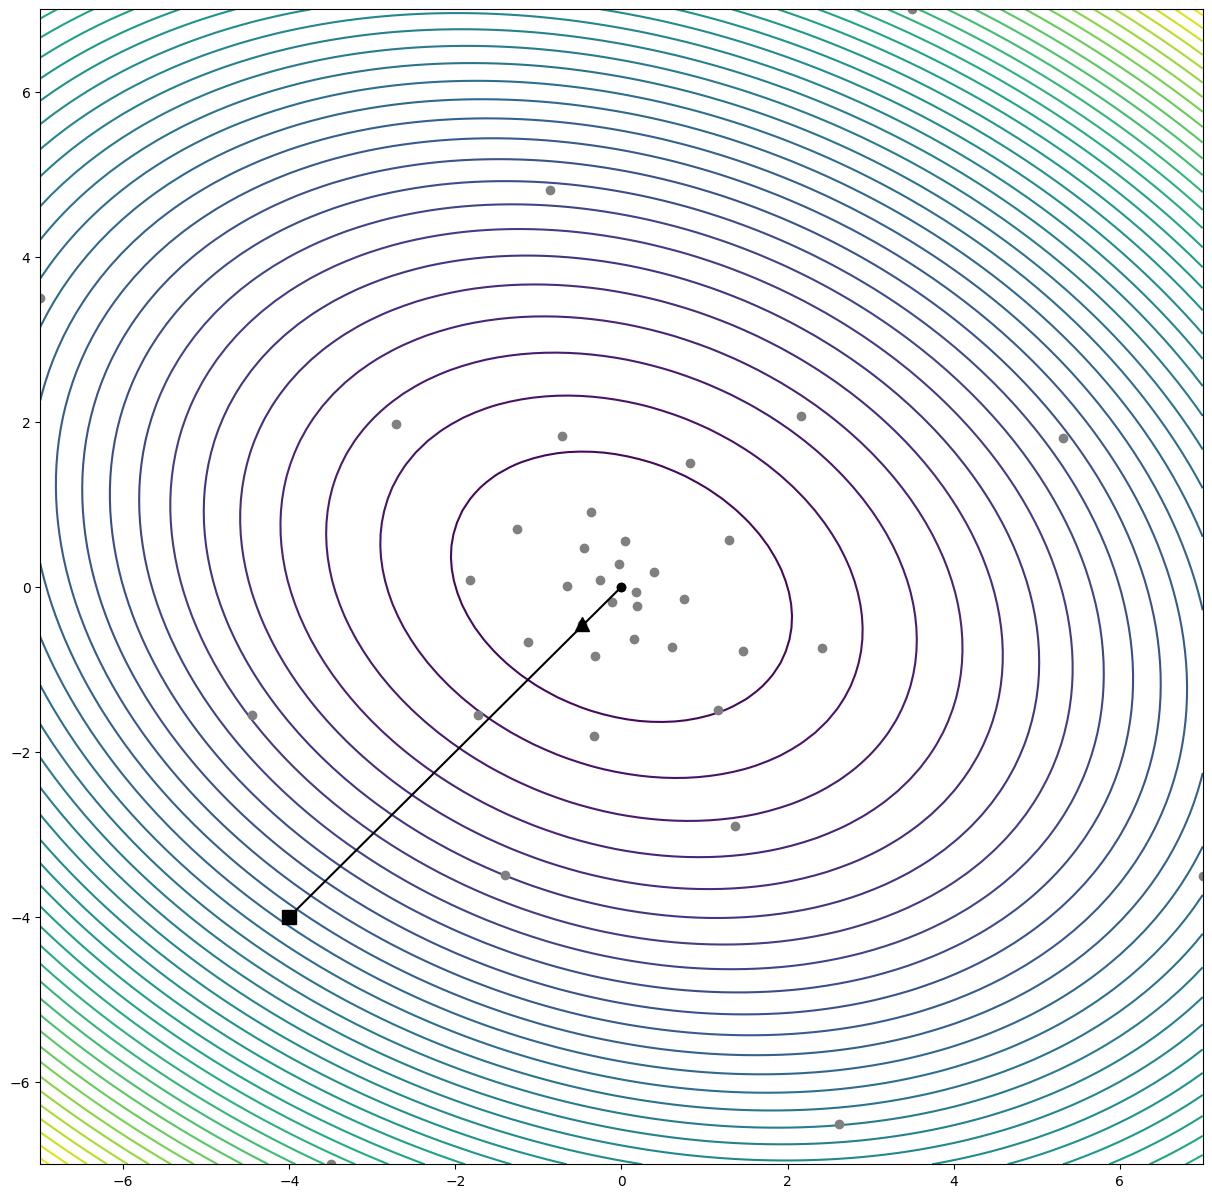

In [3]:
f_eval_ = 40 # trajectory length (= evaluation budget) --> Keep in mind that BO uses 10 datapoints to build the model when plotting

for fun_ in functions_test:
    for alg_ in algorithms_test:
        t_ = Test_function(fun_, N_x_, track_x, x_shift_origin, bounds_)
        print(alg_)
        a, b, team_names, cids = alg_(t_, N_x_, bounds_, f_eval_, has_x0=True)
        X_opt = np.array(t_.x_list[:f_eval_+1]) # needs to be capped because of COBYLA not respecting the budget
        print(len(t_.x_list))
        ML4CE_uncon_contours(t_, alg_, bounds_plot, X_opt, X_opt[-1], samples_number, fun_, SafeFig=False)